In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pandas options to see all columns
pd.set_option('display.max_columns', None)

In [3]:

# Reading Dataframes
reservamos_purchase_complete_df = pd.read_csv('./csv_data/reservamos_purchase_complete.csv')
reservamos_purchase_attemp_df = pd.read_csv('./csv_data/reservamos_purchase_attempt.csv')
tenant_purchase_complete_df = pd.read_csv('./csv_data/tenant_purchase_complete.csv')
tenant_purchase_attemp_df = pd.read_csv('./csv_data/tenant_purchase_attempt.csv')

/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_75823/4216856593.py:2: DtypeWarning: Columns (41,69,70,75) have mixed types. Specify dtype option on import or set low_memory=False.
  reservamos_purchase_complete_df = pd.read_csv('./csv_data/reservamos_purchase_complete.csv')
/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_75823/4216856593.py:3: DtypeWarning: Columns (22,82,90,92,93,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  reservamos_purchase_attemp_df = pd.read_csv('./csv_data/reservamos_purchase_attempt.csv')
/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_75823/4216856593.py:4: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  tenant_purchase_complete_df = pd.read_csv('./csv_data/tenant_purchase_complete.csv')
/var/folders/kl/504t83n11mz5hysdfhjhq_bw0000gn/T/ipykernel_75823/4216856593.py:5: DtypeWarning: Columns (30,89,90,91,92,93,94,95,96,97,99,100) have

In [4]:
# Replace spaces with underscores in columns names
reservamos_purchase_attemp_df.columns  = [columns.replace(" ", "_") for columns in reservamos_purchase_attemp_df.columns]
reservamos_purchase_complete_df.columns  = [columns.replace(" ", "_") for columns in reservamos_purchase_complete_df.columns]
tenant_purchase_attemp_df.columns  = [columns.replace(" ", "_") for columns in tenant_purchase_attemp_df.columns]
tenant_purchase_complete_df.columns  = [columns.replace(" ", "_") for columns in tenant_purchase_complete_df.columns]

In [5]:
# Adding datetime column to datasets
reservamos_purchase_attemp_df["time"] = pd.to_datetime(reservamos_purchase_attemp_df["time"], unit='s')
reservamos_purchase_attemp_df["datetime"] = reservamos_purchase_attemp_df["time"].dt.date

reservamos_purchase_complete_df["time"] = pd.to_datetime(reservamos_purchase_complete_df["time"], unit='s')
reservamos_purchase_complete_df["datetime"] = reservamos_purchase_complete_df["time"].dt.date

tenant_purchase_attemp_df["time"] = pd.to_datetime(tenant_purchase_attemp_df["time"], unit='s')
tenant_purchase_attemp_df["datetime"] = tenant_purchase_attemp_df["time"].dt.date

tenant_purchase_complete_df["time"] = pd.to_datetime(tenant_purchase_complete_df["time"], unit='s')
tenant_purchase_complete_df["datetime"] = tenant_purchase_complete_df["time"].dt.date

In [6]:
# Getting the users that did not complete the purchase in Reservamos
reservamos_purchase_attemp_df_without_duplicates = reservamos_purchase_attemp_df.drop_duplicates(subset=["User_Fingerprint", "datetime"], keep="first")
merge_df = reservamos_purchase_attemp_df_without_duplicates.merge(reservamos_purchase_complete_df, on=["User_Fingerprint", "datetime"], how='left', indicator=True)
users_not_completing_purchase_reservamos = merge_df[merge_df['_merge'] == 'left_only']


In [11]:
# Merge dataframes to get the users that moved from Reservamos to Tenant
moving_from_reservamos_to_tenant = tenant_purchase_complete_df.merge(users_not_completing_purchase_reservamos, on=["User_Fingerprint", "datetime"], how="inner", suffixes=('_complete_tenant', '_moving_reservamos'))
moving_from_reservamos_to_tenant[["time", "time_x", "User_Fingerprint", "Departure_Destination", "Departure_Origin"]]

,time,time_x,User_Fingerprint,Departure_Destination,Departure_Origin
0,2024-06-01 15:32:09,2024-06-01 15:15:03,iIlygWUmARawndIotrpg,Tequisquiapan,Ciudad de México
1,2024-06-03 07:50:09,2024-06-03 07:45:55,2sEyoD8X2sO4aJFnjLB0,Guadalajara,León
2,2024-06-03 08:50:41,2024-06-03 08:42:55,TIplDS8UNCf8WbqvcBW9,Guadalajara,Aguascalientes
3,2024-06-01 18:55:35,2024-06-01 10:13:09,L3SVgMDxbGuOwlWFuSLV,Santiago de Querétaro,Manzanillo
4,2024-06-03 20:43:13,2024-06-03 20:36:35,WCZLWmTXnWVLaOgIS3ps,Toluca,Ciudad de México
...,...,...,...,...,...
1244,2024-06-28 16:06:39,2024-06-28 15:50:57,qKHede9g8unJzt8xoufW,Zacatecas,Aguascalientes
1245,2024-06-30 21:13:15,2024-06-30 20:54:09,ORxP67iX6sw6OBLrKJsn,San Luis Potosí,Ciudad de México
1246,2024-06-28 18:45:03,2024-06-28 18:22:00,m0VnvzztB2rdXilW4p1U,Monterrey,Puebla
1247,2024-06-28 14:55:33,2024-06-28 14:50:48,QfwMmfGmcOGqLNLT4YG9,Tepic,León


In [12]:
# Complete the purchase in Tenant
tenant_purchase_complete_df.shape

(477258, 97)

In [13]:
# Get the users that did not complete the purchase in reservamos
users_not_completing_purchase_reservamos.shape[0]

116414

In [14]:
# Getting users percentage that moved from Reservamos to Tenant
porcentage_user_reservamos_to_tenant = (moving_from_reservamos_to_tenant.shape[0] / users_not_completing_purchase_reservamos.shape[0]) * 100
porcentage_user_reservamos_to_tenant

1.072895012627347

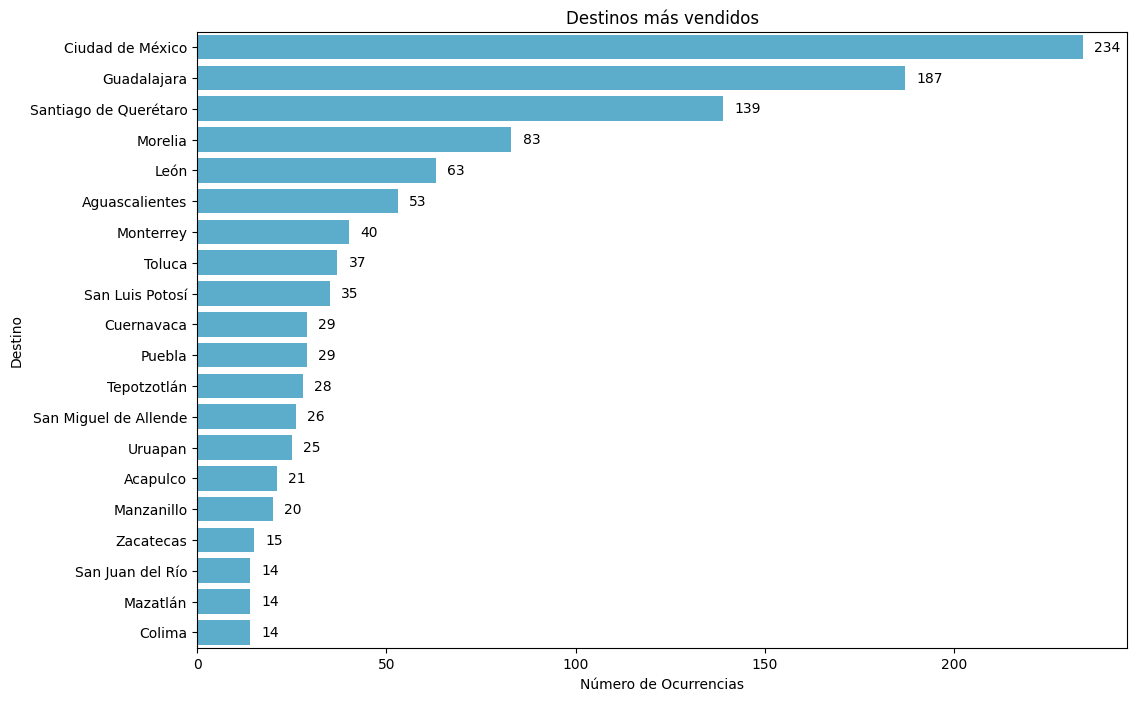

In [15]:

popular_destinations = moving_from_reservamos_to_tenant["Departure_Destination"].value_counts().head(20)

plt.figure(figsize=(12, 10))
ax = sns.barplot(y=popular_destinations.index, x=popular_destinations.values, color="#49b4df" , orient='h')

ax.set_title('Destinos más vendidos')
ax.set_xlabel('Número de Ocurrencias')
ax.set_ylabel('Destino')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 3,  
             p.get_y() + p.get_height() / 2,  
            f'{int(width):,}', 
             va='center')

plt.show()

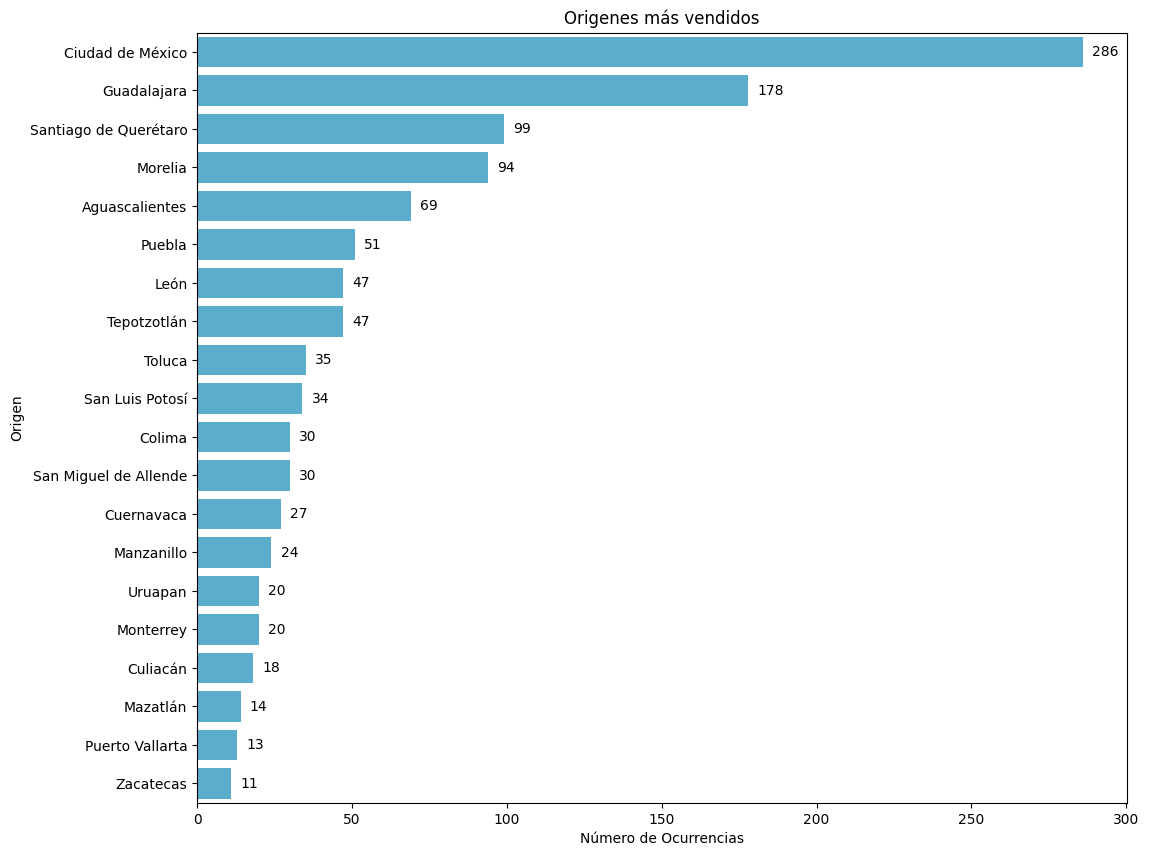

In [16]:

popular_origins = moving_from_reservamos_to_tenant["Departure_Origin"].value_counts().head(20)

plt.figure(figsize=(12, 10))
ax = sns.barplot(y=popular_origins.index, x=popular_origins.values, color="#49b4df" , orient='h')

ax.set_title('Origenes más vendidos')
ax.set_xlabel('Número de Ocurrencias')
ax.set_ylabel('Origen')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 3, 
             p.get_y() + p.get_height() / 2,
            f'{int(width):,}',  
             va='center')

plt.show()

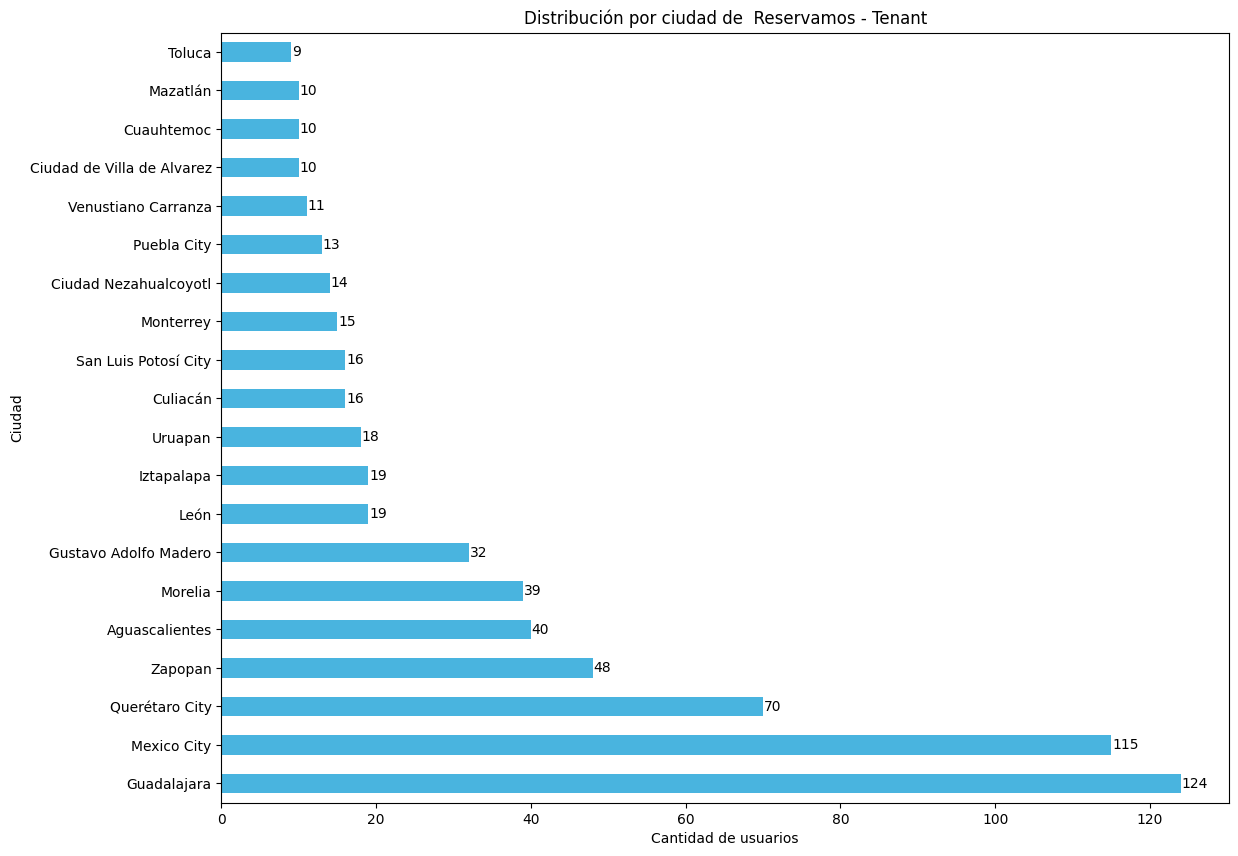

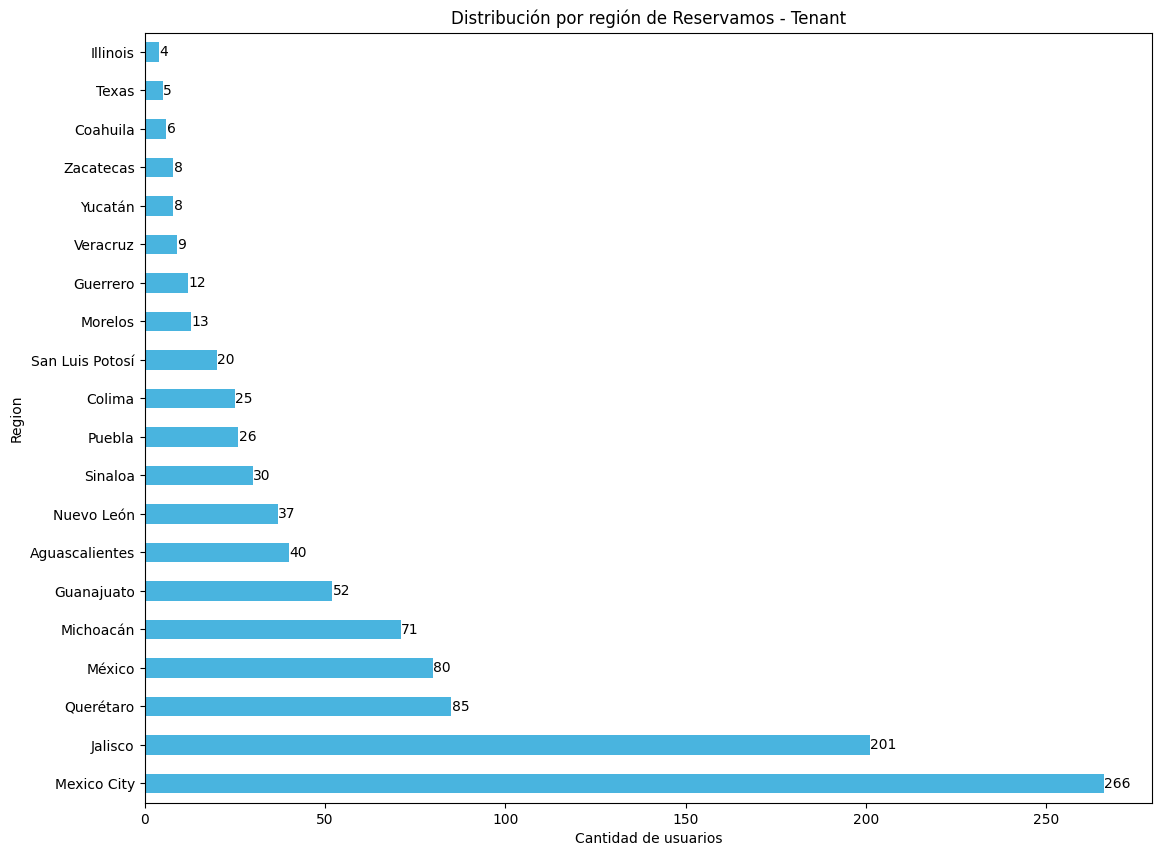

In [13]:
# Distribucion de los usuarios por ciudad y region
complete_city_region_reservamos_tenant = moving_from_reservamos_to_tenant[["User_Fingerprint", "$city", "$region"]].drop_duplicates(subset=["User_Fingerprint"], keep="last")
city = complete_city_region_reservamos_tenant["$city"].value_counts().head(20)
region = complete_city_region_reservamos_tenant["$region"].value_counts().head(20)

plt.figure(figsize=(13, 10))
ax = city.plot(kind='barh', title='Distribución por ciudad de  Reservamos - Tenant', color='#49b4df')
plt.xlabel('Cantidad de usuarios')
plt.ylabel('Ciudad')

for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + i.get_height()/2, f"{int(i.get_width()):,}",
            va='center')

plt.show()
plt.figure(figsize=(13, 10))
ax = region.plot(kind='barh', title='Distribución por región de Reservamos - Tenant', color='#49b4df')
plt.xlabel('Cantidad de usuarios')
plt.ylabel('Region')

for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + i.get_height()/2, f"{int(i.get_width()):,}",
            va='center')

In [17]:
# Getting the users that did not complete the purchase in Tenant
tenant_purchase_attemp_df_without_duplicates = tenant_purchase_attemp_df.drop_duplicates(subset=["User_Fingerprint", "datetime"], keep="first")
merge_df = tenant_purchase_attemp_df_without_duplicates.merge(tenant_purchase_complete_df, on=["User_Fingerprint", "datetime"], how='left', indicator=True)
users_not_completing_purchase_tenant = merge_df[merge_df['_merge'] == 'left_only']


In [18]:
users_not_completing_purchase_tenant.shape

(155058, 198)

In [19]:
# Merge dataframes to get the users that moved from Reservamos to Tenant
moving_from_tenant_to_reservamos = reservamos_purchase_complete_df.merge(users_not_completing_purchase_tenant, on=["User_Fingerprint", "datetime"], how="inner", suffixes=('_complete_tenant', '_moving_reservamos'))
moving_from_tenant_to_reservamos[["time", "time_x", "User_Fingerprint", "Departure_Destination", "Departure_Origin"]]

,time,time_x,User_Fingerprint,Departure_Destination,Departure_Origin
0,2024-06-01 14:38:39,2024-06-01 17:12:41,xdrWN2fRDzbpF58dkVb1,Guadalajara,Zamora
1,2024-06-02 11:38:08,2024-06-02 11:35:02,vaVgxqbSRJ1dFGnx7YMR,Santiago de Querétaro,Toluca
2,2024-06-02 11:54:33,2024-06-02 11:35:02,vaVgxqbSRJ1dFGnx7YMR,Irapuato,Santiago de Querétaro
3,2024-06-03 22:10:08,2024-06-03 21:38:53,et60MdvF79mmCEycfELa,Ciudad de México,Santiago de Querétaro
4,2024-06-03 08:47:49,2024-06-03 08:29:13,C0FwJ47PKSvHBxSDeuEe,León,Puerto Vallarta
...,...,...,...,...,...
230,2024-06-29 09:01:08,2024-06-29 08:50:28,DNZ8lXV0AHmmf9RgZZQt,Santiago de Querétaro,Puebla
231,2024-06-29 08:58:21,2024-06-29 08:49:28,zaxJMj2Q9uqQnrMMrc0o,Cuernavaca,Saltillo
232,2024-06-28 11:41:33,2024-06-28 11:18:41,JteOtWAuANmcs5XiDsLG,Guadalajara,Puebla
233,2024-06-30 17:15:20,2024-06-30 16:56:39,q3pXP85obHpt7VIVcfvY,Morelia,Guadalajara


In [20]:
# Getting users percentage that moved from Reservamos to Tenant
porcentage_user_tenant_to_reservamos = (moving_from_tenant_to_reservamos.shape[0] / users_not_completing_purchase_tenant.shape[0]) * 100
porcentage_user_tenant_to_reservamos

0.15155619187658811

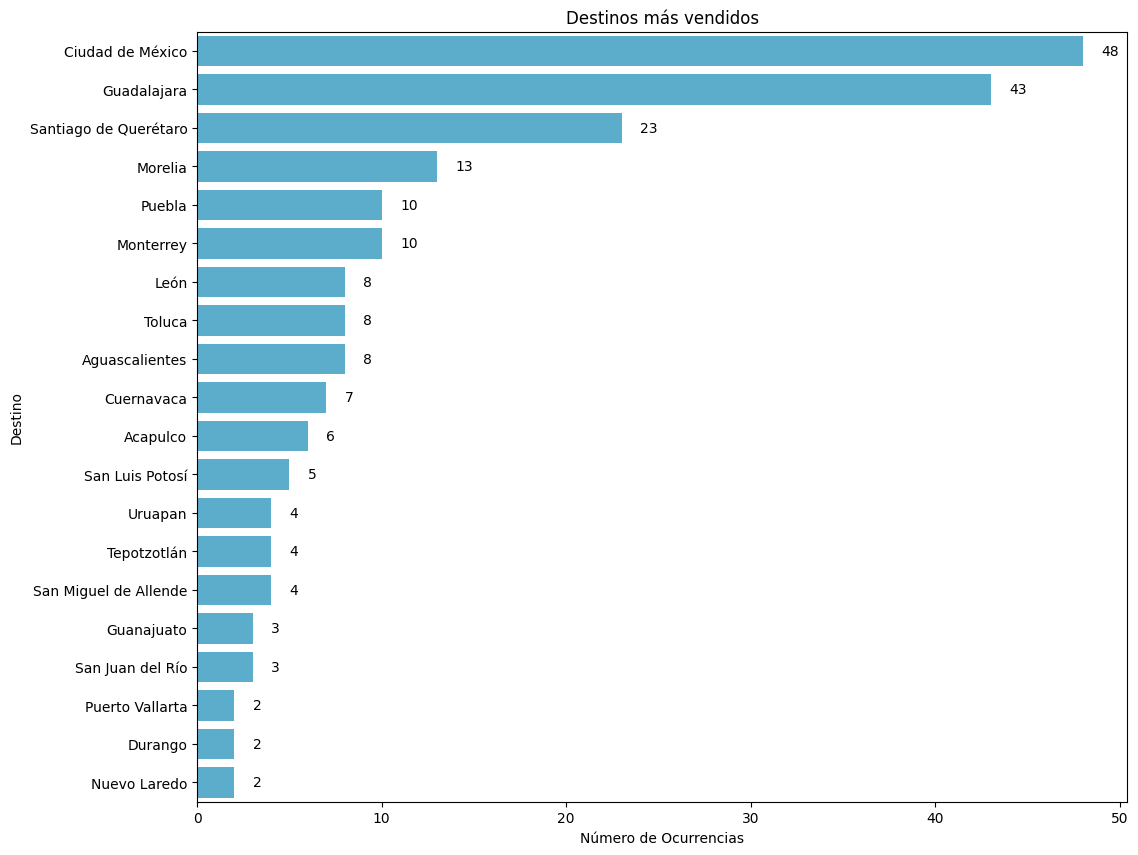

In [21]:

popular_destinations = moving_from_tenant_to_reservamos["Departure_Destination"].value_counts().head(20)

plt.figure(figsize=(12, 10))
ax = sns.barplot(y=popular_destinations.index, x=popular_destinations.values, color="#49b4df" , orient='h')

ax.set_title('Destinos más vendidos')
ax.set_xlabel('Número de Ocurrencias')
ax.set_ylabel('Destino')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1,  
             p.get_y() + p.get_height() / 2,  
            f'{int(width):,}',  
             va='center')

plt.show()

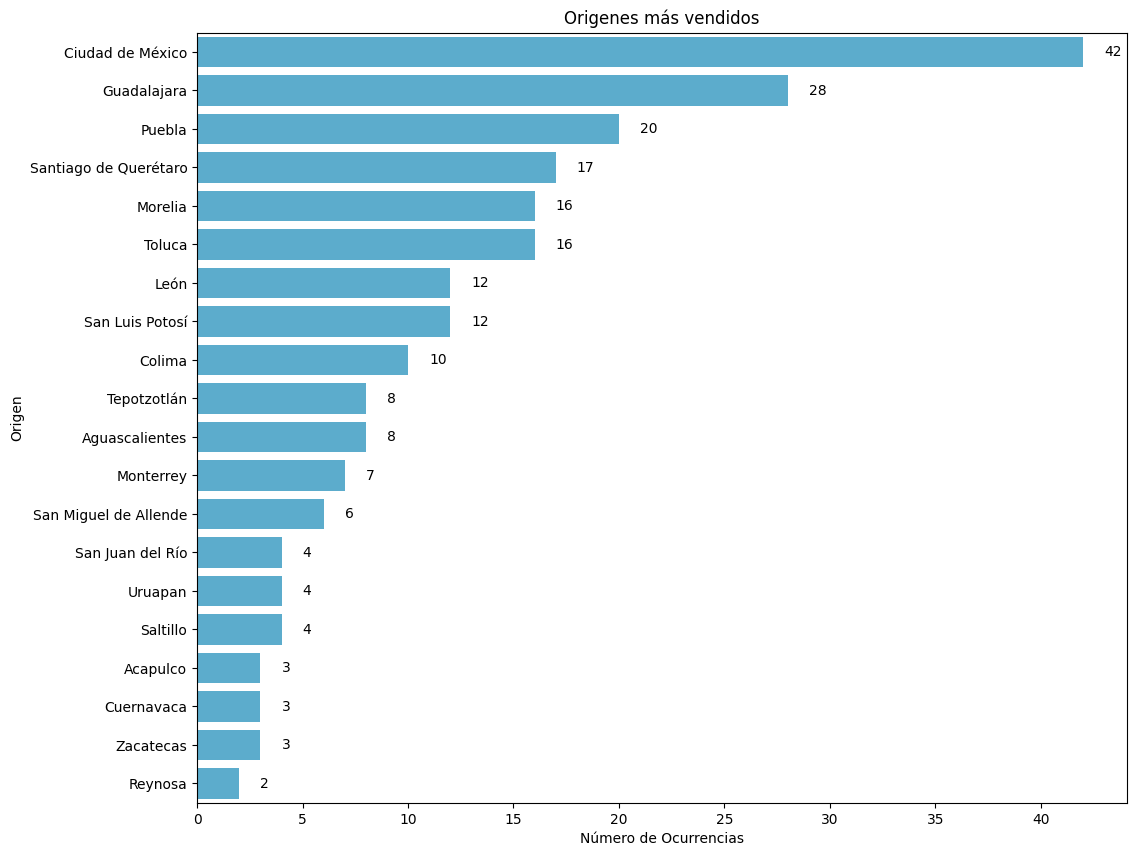

In [22]:

popular_origins = moving_from_tenant_to_reservamos["Departure_Origin"].value_counts().head(20)

plt.figure(figsize=(12, 10))
ax = sns.barplot(y=popular_origins.index, x=popular_origins.values, color="#49b4df" , orient='h')

ax.set_title('Origenes más vendidos')
ax.set_xlabel('Número de Ocurrencias')
ax.set_ylabel('Origen')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, 
             p.get_y() + p.get_height() / 2,  
            f'{int(width):,}',  
             va='center')

plt.show()

In [23]:

# distribution by   city and region of the users who moved from Tenant to Reservamos
complete_city_region_reservamos_tenant = moving_from_tenant_to_reservamos[["User_Fingerprint", "$city", "$region"]].drop_duplicates(subset=["User_Fingerprint"], keep="last")
city = complete_city_region_reservamos_tenant["$city"].value_counts().head(20)
region = complete_city_region_reservamos_tenant["$region"].value_counts().head(20)

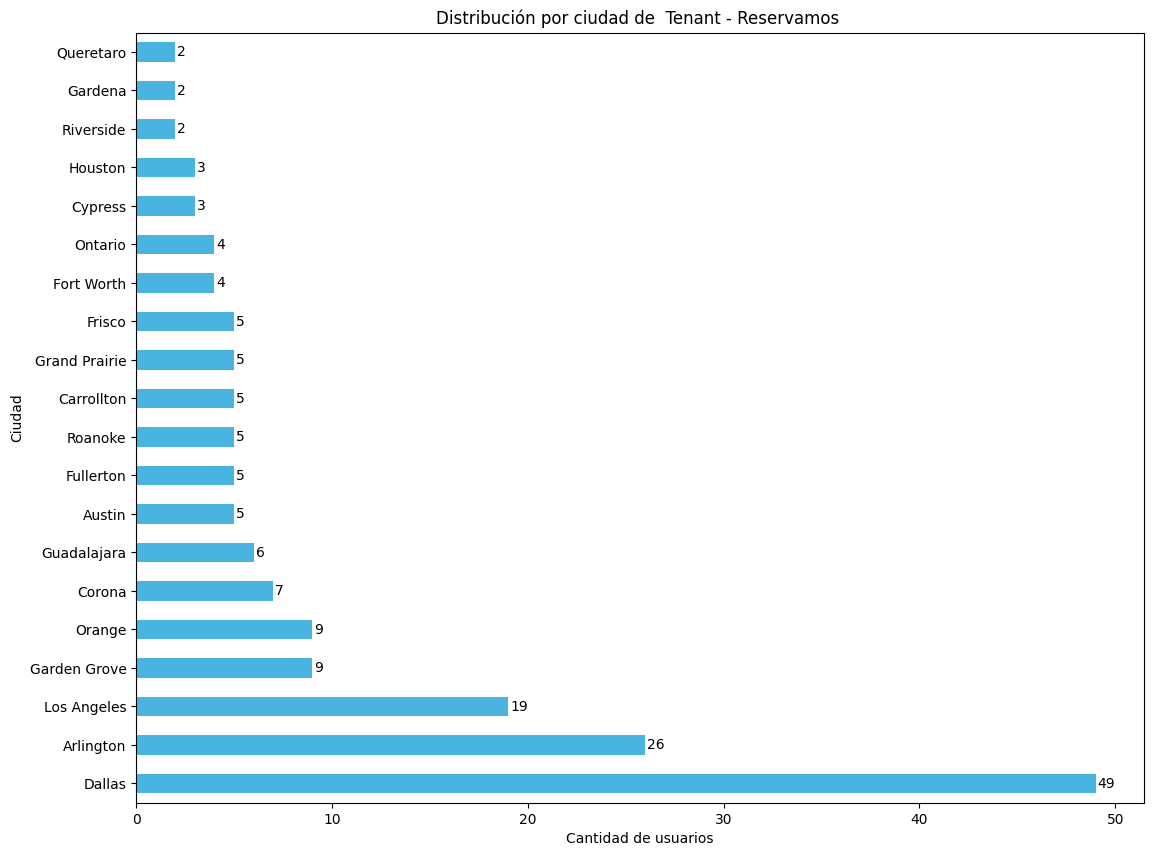

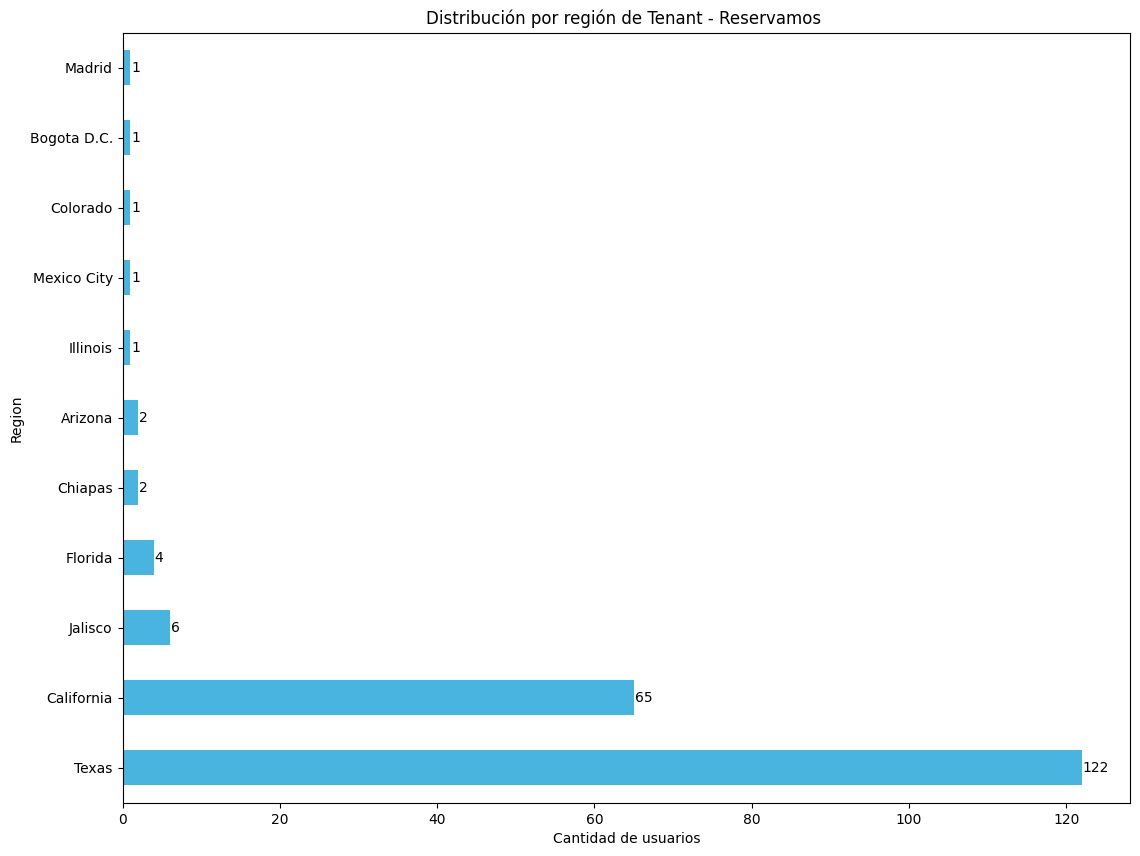

In [24]:
plt.figure(figsize=(13, 10))
ax = city.plot(kind='barh', title='Distribución por ciudad de  Tenant - Reservamos ', color='#49b4df')
plt.xlabel('Cantidad de usuarios')
plt.ylabel('Ciudad')

for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + i.get_height()/2, f"{int(i.get_width()):,}",
            va='center')

plt.show()
plt.figure(figsize=(13, 10))
ax = region.plot(kind='barh', title='Distribución por región de Tenant - Reservamos ', color='#49b4df')
plt.xlabel('Cantidad de usuarios')
plt.ylabel('Region')

for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + i.get_height()/2, f"{int(i.get_width()):,}",
            va='center')